In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")


In [42]:
df = pd.read_csv('../../ML/car-sense-Analytics/car_dataset_v3.csv')
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,PRICE,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,brand,model,year,max,min,adult passangers,weight(kg),transmission,fuel,tank,...,bluetooth,android_auto/apple+play,cruise_control,cruise_control_advanced,blind_spot_alert,rain_sensor,car_tow,car_pull,body_type,segment
1,Toyota,Yaris,2024,"$388,700","$312,800",5,1035,A/S,Gas,40,...,yes,yes,yes,yes,yes,no,no,NaN,Sedan,Sedan-SmallSize
2,Toyota,Corolla,2024,"$529,900","$419,900",5,1405,A,Gas,50,...,yes,yes,yes,yes,yes,no,no,NaN,Sedan,Sedan-MidSize
3,Toyota,Cambry,2024,"$598,800","$571,900",5,1515,A,Gas,60.6,...,yes,yes,yes,yes,yes,no,no,NaN,Sedan,Sedan-Fullsize*
4,Toyota,Raize,2024,"$400,000","$378,400",5,1035,A/S,Gas,36,...,yes,yes,no,no,no,no,no,no,SUV,SUV-SmallSize


In [43]:
df['segment'].unique()

KeyError: 'segment'

In [ ]:
def normalize_segments(raw_segment):
    segments = dict(
        city_values = ['Ciudad'],
        sed_s_values = ['Sedan-SmallSize'],
        sed_m_values = ['Sedan-MidSize', 'Sedan/MidSize/Hybrid'],
        sedan_f_values = ['Sedan-FullSize','Sedan-Fullsize*', 'Sedan-FullSize/Hybrid', 'Sedan-Fullsize'],
        suv_s_values = ['SUV-City', 'SUV-SmallSize'],
        suv_m_values = ['SUV-MidSize'] ,
        suv_f_values = ['SUV-Fullsize', 'SUV-Fullsize/Hybrid', 'SUV-FullSize'],
        suv_xl_values = ['SUV-ExtendedSize'],
        pu_s_values = ['Pickup-SmallSize'],
        pu_m_values = ['Pickup-MidSize'],
        pu_f_values = ['Pickup-FullSize/Hybrid', 'Pickup-FullSize'],
        mini_van_values = ['MiniVan', 'MiniVan/Hybrid']
        
    )
    for k, values in segments.items():
        try:
            if values.index(raw_segment) >= 0:
                return k[:-7]
        except ValueError:
            continue
    
    print('raw_segment: [{}]not found.'.format(raw_segment))
    return 'Not found'
  

In [44]:
df['segment_normalized'] = df['segment'].apply(normalize_segments)


KeyError: 'segment'

In [45]:
def category_classifer(raw_segment):
    segments = dict(
        city_values = ['Ciudad'],
        sedan_values = [
            'Sedan-SmallSize', 'Sedan-MidSize', 'Sedan/MidSize/Hybrid', 
            'Sedan-FullSize','Sedan-Fullsize*', 'Sedan-FullSize/Hybrid', 'Sedan-Fullsize'
        ],
       
        suv_values = [
            'SUV-City', 'SUV-SmallSize', 'SUV-MidSize', 
            'SUV-Fullsize', 'SUV-Fullsize/Hybrid', 
            'SUV-FullSize','SUV-ExtendedSize'
        ],
       
        pu_values = ['Pickup-SmallSize', 'Pickup-MidSize', 'Pickup-FullSize/Hybrid', 'Pickup-FullSize', ],
        mini_van_values = ['MiniVan', 'MiniVan/Hybrid']
        
    )
    for k, values in segments.items():
        try:
            if values.index(raw_segment) >= 0:
                return k[:-7]
        except ValueError:
            continue
    
    print('category: [{}]not found.'.format(raw_segment))
    return 'Not found'

In [46]:
df['category'] = df['segment'].apply(category_classifer)
df.head()

KeyError: 'segment'

In [47]:
order_labels =[
    'city', 
    'sed_s', 'sed_m', 'sedan_f',
    'suv_s', 'suv_m', 'suv_f', 'suv_xl',
    'pu_s', 'pu_m','pu_f',
    'mini_van', 
    'Not found' 
]

plt.figure(figsize=(12,12))
sns.swarmplot(x='segment_normalized', y='length', data=df, order=order_labels)

ValueError: Could not interpret value `segment_normalized` for parameter `x`

<Figure size 1200x1200 with 0 Axes>

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(df, x='segment_normalized')

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(df, x='category')

In [ ]:
df.columns


In [ ]:

ax = sns.scatterplot(x='length', y='width', hue='segment_normalized', data=df)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [ ]:
df[['length', 'width', 'segment_normalized']]

In [48]:
df_suv_m = df[df['segment_normalized'] == 'suv_m']
df_suv_m = df_suv_m.sort_values(by=['length'])
df_suv_m.head()

KeyError: 'segment_normalized'

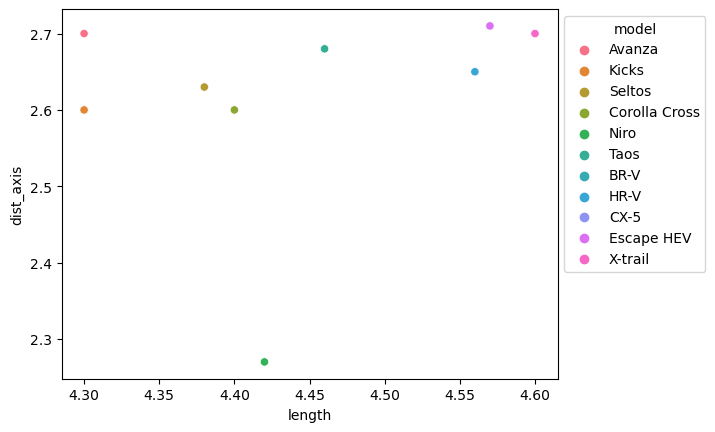

In [49]:
ax = sns.scatterplot(x='length', y='dist_axis', hue='model', data=df_suv_m )
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [50]:
df_all_suv = df[df['category'] == 'suv']
df_all_suv

KeyError: 'category'

In [ ]:
df_all_suv[['brand', 'model', 'adult passangers','length','segment_normalized','category']].sort_values(by='length')

In [51]:
df_sedans = df[(df['category'] == 'city') | (df['category'] == 'sedan')]

KeyError: 'category'

In [52]:
df_sedans.head()

,brand,model,year,max,min,adult passangers,weight(kg),transmission,fuel,tank,...,cruise_control,cruise_control_advanced,blind_spot_alert,rain_sensor,car_tow,car_pull,body_type,segment,segment_normalized,category
17,Honda,Accord Hybrid,2024,"$895,900","$895,900",5,1642.0,A,Gas/Hybrid,48.5,...,yes,yes,yes,yes,no,no,Sedan,Sedan-FullSize/Hybrid,sedan_f,sedan
43,Nissan,Altima,2024,"$820,900","$750,900",5,1572.0,A,Gas,61.3,...,yes,yes,yes,yes,no,no,Sedan,Sedan-Fullsize,sedan_f,sedan
16,Honda,Accord,2024,"$755,900","$755,900",5,1571.0,A,Gas,56,...,yes,yes,yes,yes,no,no,Sedan,Sedan-FullSize,sedan_f,sedan
15,Honda,Civic,2024,"$659,900","$550,900",5,1379.0,A,Gas,46,...,yes,yes,yes,yes,no,no,Sedan,Sedan-MidSize,sed_m,sedan
57,Mazda,MX-5,2024,"$619,900",NaN,2,1242.0,A/S,Gas,45,...,yes,yes,yes,yes,no,NaN,Roadster,Ciudad,city,city


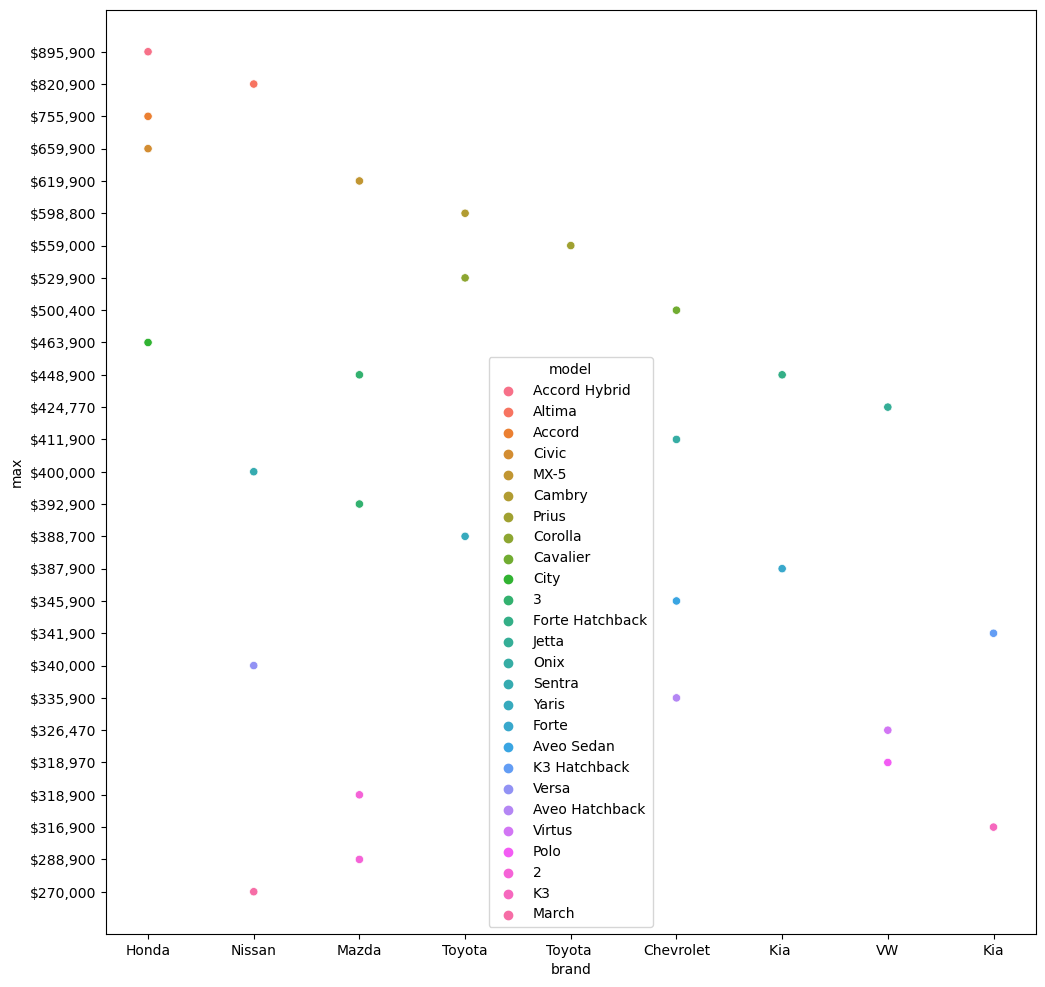

In [53]:
plt.figure(figsize=(12,12))
df_sedans = df_sedans.sort_values(by=['max'], ascending=False)
ax = sns.scatterplot(x='brand',  y='max', hue='model', data=df_sedans )
